### Rachana Amgai
### Assignment 11
### 11/16/2024

In [ ]:
from scipy import stats

### 1a

In [37]:
# Import required libraries
from scipy.stats import binom

# Part (a): Ensemble accuracy with 15 individual models each having 63% accuracy

# Given values
num_models_a = 15  # number of models
individual_accuracy_a = 0.63  # accuracy of each individual model
majority_vote_threshold_a = (num_models_a // 2) + 1  # majority threshold

# Calculate ensemble accuracy
ensemble_accuracy_a = sum(binom.pmf(k, num_models_a, individual_accuracy_a) for k in range(majority_vote_threshold_a, num_models_a + 1))
print(f"Part (a): Ensemble accuracy with 15 models, each with 63% accuracy: {ensemble_accuracy_a:.4f}")


Part (a): Ensemble accuracy with 15 models, each with 63% accuracy: 0.8513


### 1b

In [3]:
# Part (b): Required individual model accuracy for 95% ensemble accuracy

# Target accuracy for the ensemble model
target_ensemble_accuracy_b = 0.95

# Loop through individual accuracies to find the smallest integer percent that meets the target accuracy
individual_accuracy_b = 0
ensemble_accuracy_b = 0

while ensemble_accuracy_b < target_ensemble_accuracy_b:
    individual_accuracy_b += 0.01  # increase accuracy by 1%
    ensemble_accuracy_b = sum(binom.pmf(k, num_models_a, individual_accuracy_b) for k in range(majority_vote_threshold_a, num_models_a + 1))

# Convert individual accuracy from decimal to whole number percentage
individual_accuracy_b_percent = int(individual_accuracy_b * 100)
print(f"Part (b): Required individual model accuracy for 95% ensemble accuracy: {individual_accuracy_b_percent}%")


Part (b): Required individual model accuracy for 95% ensemble accuracy: 71%


In [5]:
# Part (c): Minimum number of models for 95% ensemble accuracy with 63% individual accuracy

# Target accuracy for the ensemble model
target_ensemble_accuracy_c = 0.95
individual_accuracy_c = 0.63
num_models_c = 15  # starting with 15 models as the initial condition
ensemble_accuracy_c = 0

# Find the smallest odd number of models for target accuracy
while ensemble_accuracy_c < target_ensemble_accuracy_c:
    majority_vote_threshold_c = (num_models_c // 2) + 1
    ensemble_accuracy_c = sum(binom.pmf(k, num_models_c, individual_accuracy_c) for k in range(majority_vote_threshold_c, num_models_c + 1))
    if ensemble_accuracy_c < target_ensemble_accuracy_c:
        num_models_c += 2  # increment by 2 to keep it an odd number

print(f"Part (c): Number of models needed for 95% ensemble accuracy with 63% individual accuracy: {num_models_c}")


Part (c): Number of models needed for 95% ensemble accuracy with 63% individual accuracy: 39


### part 2

In [22]:
# (a) Define the pmf for X
# Values that X can take on
values = [1, 2, 3, 4, 5]
# Probabilities corresponding to each value
probabilities = [0.1, 0.2, 0.3, 0.2, 0.2]  # These probabilities sum to 1


In [24]:
# (b) Function to generate 50 random X-values and calculate their mean
import numpy as np

def generate_sample_mean():
    sample = np.random.choice(values, size=50, p=probabilities)
    return np.mean(sample)


In [26]:
# (c) Function to run the function from part (b) 1,000 times and store the means in a list
def run_simulation(n=1000):
    means = [generate_sample_mean() for _ in range(n)]
    return means

# Run the simulation and store the list of means
means_list = run_simulation()


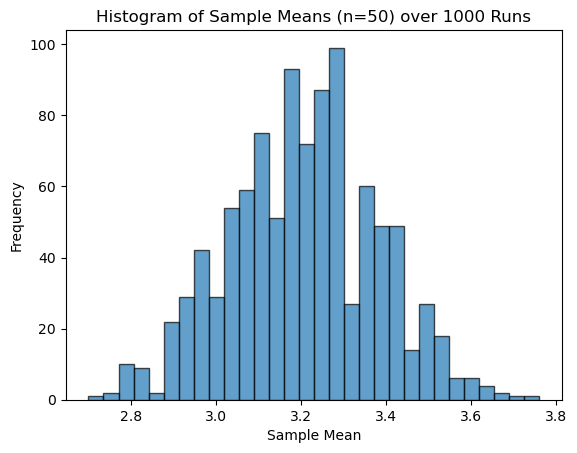

In [14]:
# (d) Create a histogram of the means
import matplotlib.pyplot as plt

plt.hist(means_list, bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogram of Sample Means (n=50) over 1000 Runs")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()


In [16]:
# (e) Calculate the mean and standard deviation of the means list
mean_of_means = np.mean(means_list)
std_dev_of_means = np.std(means_list)
print("Mean of means:", mean_of_means)
print("Standard deviation of means:", std_dev_of_means)


Mean of means: 3.20354
Standard deviation of means: 0.17440145756271647


In [28]:
# Calculate theoretical mean and standard deviation for comparison
theoretical_mean = np.dot(values, probabilities)
theoretical_variance = np.dot([(x - theoretical_mean)**2 for x in values], probabilities)
theoretical_std_dev = np.sqrt(theoretical_variance / 50)  # Standard deviation of the sample mean

print("Theoretical mean:", theoretical_mean)
print("Theoretical standard deviation:", theoretical_std_dev)


Theoretical mean: 3.2
Theoretical standard deviation: 0.17663521732655693
